## Package Installation

In [42]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
import seaborn as sns
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Dataset 

In [43]:
SAVEE = "C:/Users/User/Desktop/bits/project/speech emotion audio files/SAVE/ALL/"
RAV ="C:/Users/User/Desktop/bits/project/speech emotion audio files/RAV/"

In [44]:

dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)
        
        


## RAV Dataset

In [46]:
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

female_neutral     144
male_neutral       144
female_happy        96
male_sad            96
female_surprise     96
female_disgust      96
male_fear           96
female_angry        96
male_angry          96
female_fear         96
male_surprise       96
female_sad          96
male_happy          96
male_disgust        96
Name: labels, dtype: int64

In [48]:
 #Source - RAVDESS; Gender - Female; Emotion - Fear
path = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

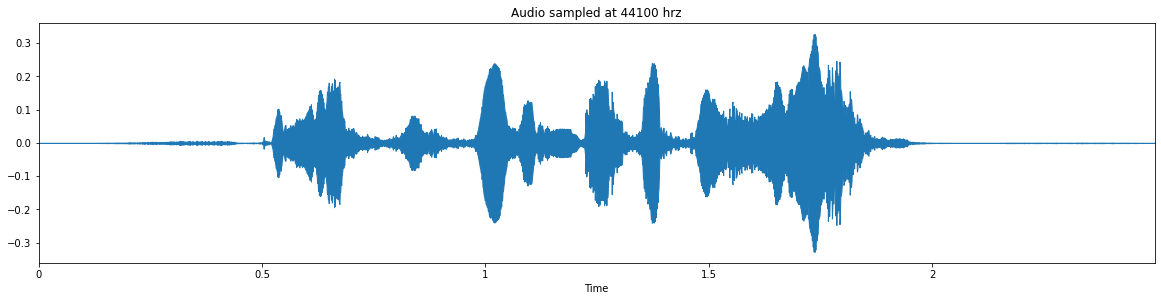

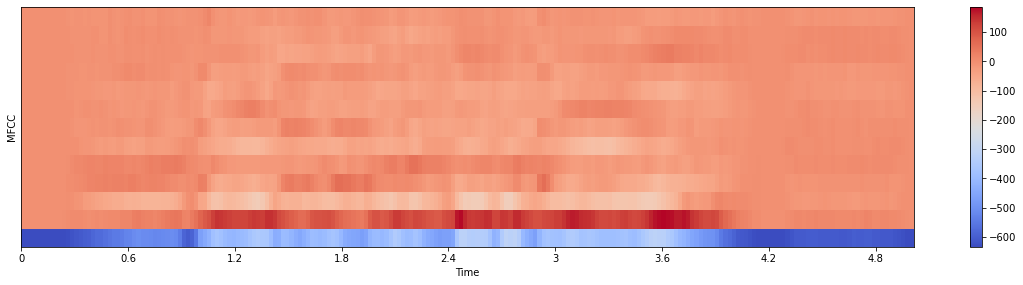

In [49]:
# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

In [50]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
path_h= RAV + 'Actor_11/03-01-03-01-02-02-11.wav'
X, sample_rate = librosa.load(path_h, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


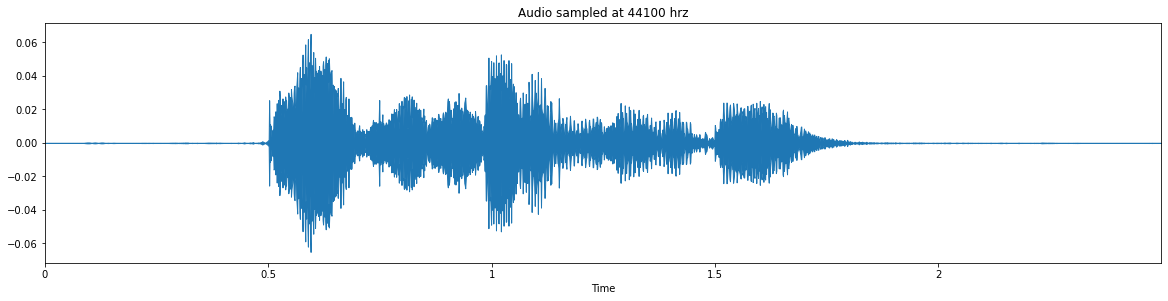

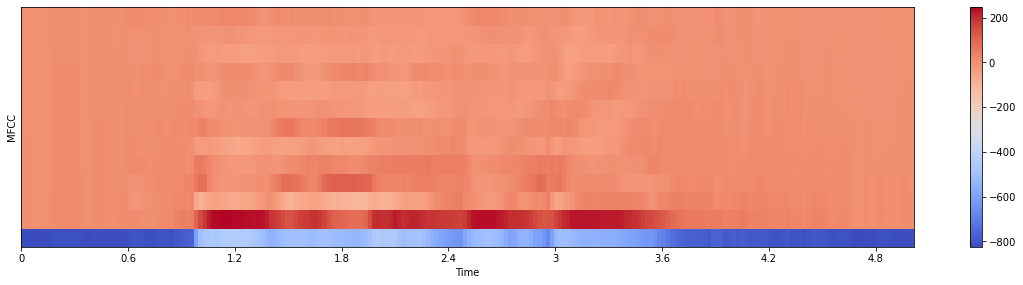

In [51]:
# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path_h)


216
216


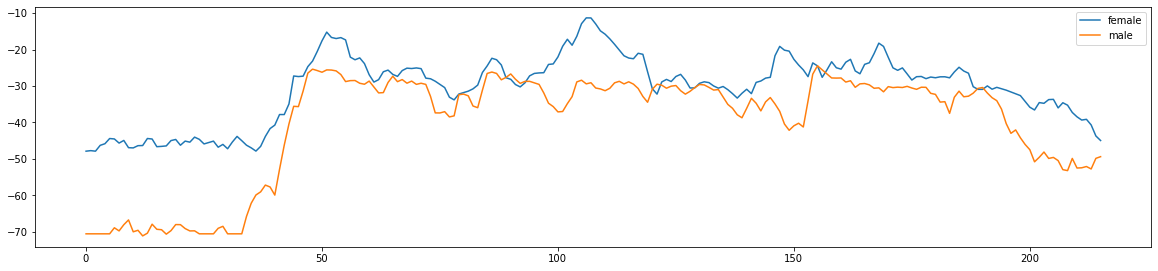

In [52]:
path_f = RAV + "Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path_f, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path_m = RAV +"Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path_m, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

## SAVEE DATASET

In [53]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)


In [54]:
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_surprise     60
male_happy        60
male_angry        60
male_sad          60
male_disgust      60
male_fear         60
Name: labels, dtype: int64

In [55]:
path_s = SAVEE +'DC_f11.wav'
X, sample_rate = librosa.load(path_s, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


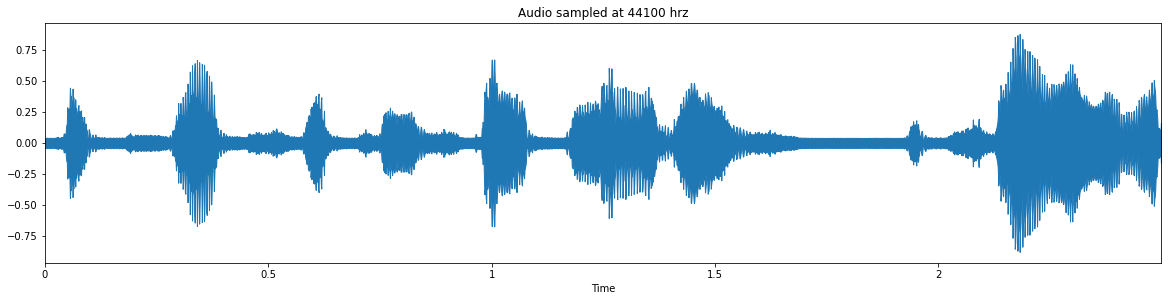

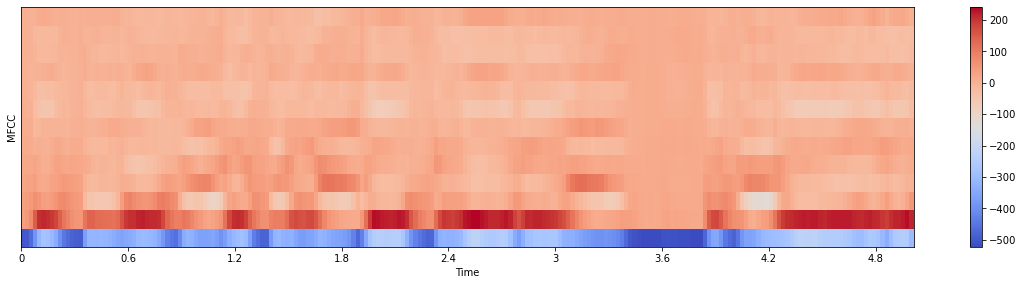

In [56]:
# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path_s)

In [57]:
path_sh = SAVEE +'DC_h11.wav'
X, sample_rate = librosa.load(path_sh, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
 

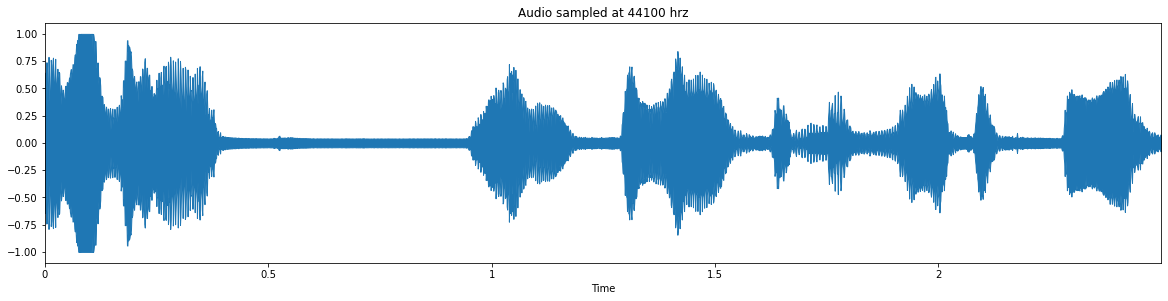

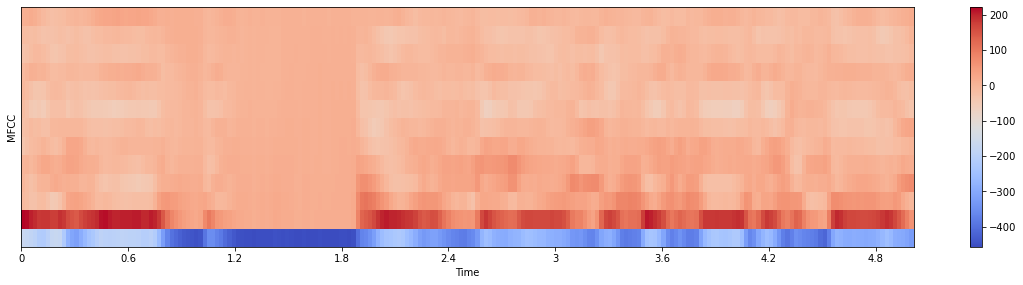

In [58]:
# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path_sh)

In [59]:
df = pd.concat([SAVEE_df, RAV_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

male_neutral       264
male_sad           156
male_fear          156
male_angry         156
male_surprise      156
male_happy         156
male_disgust       156
female_neutral     144
female_happy        96
female_surprise     96
female_disgust      96
female_angry        96
female_fear         96
female_sad          96
Name: labels, dtype: int64


In [60]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import TimeDistributed, LSTM, ConvLSTM2D
from tensorflow.keras import layers

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd

In [61]:
from tensorflow.keras.utils import to_categorical

## Dataset Combining

In [62]:
ref = pd.read_csv("C:/Users/User/Desktop/bits/project/final test/Data_path.csv")
ref.head()

,labels,source,path
0,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...
1,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...
2,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...
3,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...
4,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...


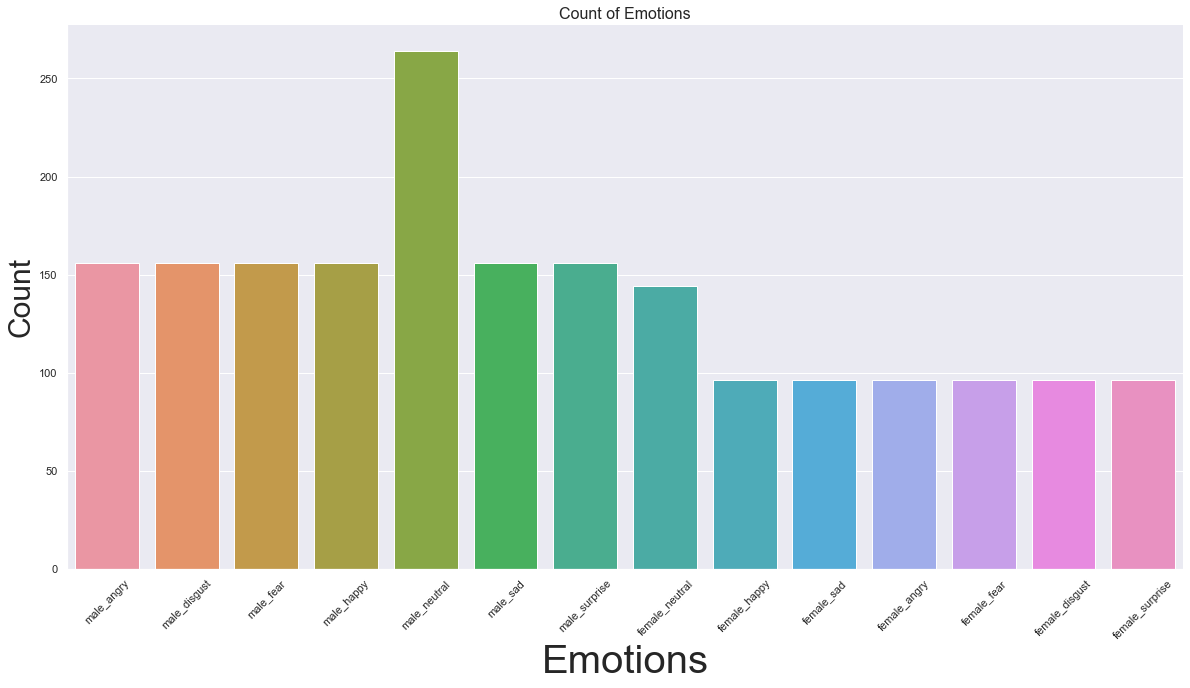

In [79]:
plt.title('Count of Emotions', size=16)
chart=sns.countplot(ref.labels)
sns.set(rc={'figure.figsize':(20,10)})
plt.ylabel('Count', size=30)
plt.xlabel('Emotions', size=40)
sns.despine(top=True, right=True, left=False, bottom=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

## Feature Extraction

In [20]:
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

1920


,feature
0,"[-11.113933, -7.215756, -6.21919, -5.9265423, ..."
1,"[-24.449831, -22.465742, -22.928043, -23.24380..."
2,"[-25.000114, -24.520256, -24.178183, -23.84745..."
3,"[-1.529839, -4.333437, -12.285238, -13.083024,..."
4,"[-22.458635, -22.467834, -25.884357, -27.82704..."


In [21]:
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...,-11.113933,-7.215756,-6.219190,-5.926542,-5.850419,-4.808960,-2.513003,...,-4.088852,-5.023864,-5.254714,-5.234095,-5.310307,-5.621666,-6.072197,-6.611348,-2.509089,1.964608
1,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...,-24.449831,-22.465742,-22.928043,-23.243807,-22.926605,-23.432241,-14.830004,...,-22.627258,-22.633406,-22.511597,-24.300154,-24.496809,-22.895985,-23.511503,-24.342152,-24.530262,-25.457796
2,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...,-25.000114,-24.520256,-24.178183,-23.847450,-15.182783,-10.732485,-8.681472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...,-1.529839,-4.333437,-12.285238,-13.083024,-12.041327,-11.819768,-9.414148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...,-22.458635,-22.467834,-25.884357,-27.827044,-27.593534,-26.666508,-18.659023,...,-25.291666,-25.854906,-26.821354,-25.436455,-24.179941,-23.281618,-24.167494,-25.228062,-25.902941,-25.589964


## Preprocessing

In [22]:
df=df.fillna(0)
print(df.shape)
df[:5]

(1920, 219)


,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...,-11.113933,-7.215756,-6.219190,-5.926542,-5.850419,-4.808960,-2.513003,...,-4.088852,-5.023864,-5.254714,-5.234095,-5.310307,-5.621666,-6.072197,-6.611348,-2.509089,1.964608
1,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...,-24.449831,-22.465742,-22.928043,-23.243807,-22.926605,-23.432241,-14.830004,...,-22.627258,-22.633406,-22.511597,-24.300154,-24.496809,-22.895985,-23.511503,-24.342152,-24.530262,-25.457796
2,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...,-25.000114,-24.520256,-24.178183,-23.847450,-15.182783,-10.732485,-8.681472,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...,-1.529839,-4.333437,-12.285238,-13.083024,-12.041327,-11.819768,-9.414148,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male_angry,SAVEE,C:/Users/User/Desktop/bits/project/speech emot...,-22.458635,-22.467834,-25.884357,-27.827044,-27.593534,-26.666508,-18.659023,...,-25.291666,-25.854906,-26.821354,-25.436455,-24.179941,-23.281618,-24.167494,-25.228062,-25.902941,-25.589964


## Train and Test Dataset

In [23]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.2
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
1557,-60.297245,-60.297245,-60.297245,-60.297245,-60.297245,-60.297245,-60.297245,-60.297245,-60.297245,-60.297245,...,-59.276894,-59.917194,-60.068626,-59.560112,-60.246170,-60.343796,-60.179958,-60.407856,-60.297245,-60.297245
1701,-58.924797,-60.993488,-66.646667,-65.906052,-62.264805,-61.728050,-62.220459,-66.487862,-66.374069,-59.295303,...,-37.950077,-42.264507,-44.097836,-39.001663,-32.564980,-31.311375,-29.243635,-27.497892,-27.251892,-25.132702
1022,-50.107021,-47.564384,-47.555668,-49.755825,-49.062851,-48.615200,-49.874905,-50.604305,-50.441830,-50.411678,...,-41.173672,-42.288372,-42.716427,-43.281235,-43.536053,-43.394901,-44.118851,-47.753983,-50.587345,-50.020237
1394,-52.900173,-52.822117,-52.397060,-52.346714,-52.699764,-52.671467,-52.916019,-53.679375,-53.256329,-53.326431,...,-46.322445,-48.518387,-51.017273,-53.263401,-50.847923,-51.103653,-53.101326,-53.589024,-53.486084,-53.002754
405,-16.630131,-18.128063,-22.425585,-23.455980,-25.459324,-26.608212,-29.364145,-30.062263,-29.137520,-28.316921,...,-27.541185,-25.622807,-25.382181,-25.306181,-23.671017,-23.371763,-24.034941,-23.577168,-20.271578,-17.548586
651,-52.029594,-51.959499,-52.545200,-54.121338,-51.100746,-50.539547,-52.662663,-49.428677,-47.137337,-48.998230,...,-28.537596,-27.598995,-28.794193,-30.067226,-32.544804,-34.476635,-35.912453,-36.928596,-37.689342,-37.069138
1096,-48.419827,-48.523376,-48.933453,-48.490391,-49.483562,-49.126469,-49.507149,-50.532600,-48.247765,-47.784065,...,-26.546970,-26.009083,-24.909212,-23.641085,-22.667072,-22.717587,-23.632301,-23.081896,-23.063042,-21.715858
309,-23.552427,-22.695812,-10.607899,-3.628489,-2.357071,-2.730325,-2.662839,-1.454552,-0.942567,-1.160610,...,-8.850004,-8.500657,-8.117184,-8.510022,-10.123488,-14.074220,-15.872834,-17.316954,-17.683519,-19.257982
226,-27.504190,-27.453255,-27.221724,-25.316860,-22.780470,-22.947187,-22.650169,-22.132626,-22.999142,-22.690113,...,-22.966978,-21.947182,-22.793785,-22.048553,-21.263027,-21.956982,-24.069176,-25.422636,-26.622854,-26.917145
1634,-57.179878,-58.847603,-59.866753,-60.118149,-60.156803,-60.958305,-62.416931,-62.439651,-62.012009,-61.938320,...,-60.163082,-60.583115,-61.001690,-59.501247,-57.083633,-59.726463,-61.179287,-62.268040,-61.624374,-59.491783


In [24]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
1557,-0.746694,-0.766494,-0.772081,-0.768690,-0.769455,-0.773610,-0.774540,-0.771896,-0.775995,-0.779106,...,-1.176542,-1.197616,-1.192009,-1.148146,-1.175271,-1.168393,-1.139155,-1.131291,-1.121463,-1.093681
1701,-0.668370,-0.806575,-1.145920,-1.094487,-0.882129,-0.854839,-0.882668,-1.117389,-1.115411,-0.723256,...,0.025993,-0.206882,-0.301041,-0.006207,0.354814,0.431022,0.549019,0.650647,0.597349,0.638923
1022,-0.165150,-0.033501,-0.021886,-0.156375,-0.126108,-0.110402,-0.188574,-0.230942,-0.225528,-0.228066,...,-0.155773,-0.208222,-0.223976,-0.243920,-0.251615,-0.234667,-0.262711,-0.446136,-0.616415,-0.587319
1394,-0.324552,-0.336173,-0.306936,-0.306871,-0.334379,-0.340682,-0.359552,-0.402558,-0.382730,-0.390540,...,-0.446092,-0.557873,-0.687058,-0.798389,-0.655781,-0.659347,-0.752879,-0.762079,-0.767189,-0.734272
405,1.745339,1.661060,1.457715,1.371294,1.225567,1.138971,0.964586,0.915491,0.964407,1.003536,...,0.612909,0.727111,0.743056,0.754522,0.846430,0.868421,0.833254,0.862937,0.960421,1.012603
651,-0.274869,-0.286515,-0.315658,-0.409952,-0.242810,-0.219650,-0.345308,-0.165331,-0.040959,-0.149278,...,0.556725,0.616200,0.552709,0.490065,0.355929,0.256646,0.185106,0.140013,0.054458,0.050799
1096,-0.068863,-0.088708,-0.103007,-0.082870,-0.150201,-0.139427,-0.167898,-0.226940,-0.102981,-0.081598,...,0.668969,0.705432,0.769442,0.847011,0.901923,0.904460,0.855225,0.889754,0.815227,0.807276
309,1.350291,1.398108,2.153513,2.523006,2.548536,2.494558,2.465791,2.512062,2.539214,2.517278,...,1.666831,1.688069,1.706225,1.687481,1.595273,1.380628,1.278654,1.201902,1.095036,0.928378
226,1.124768,1.124236,1.175329,1.263202,1.378974,1.346813,1.342060,1.358037,1.307261,1.317184,...,0.870830,0.933401,0.887456,0.935470,0.979532,0.946362,0.831385,0.763013,0.630068,0.551001
1634,-0.568790,-0.683043,-0.746734,-0.758287,-0.761412,-0.811140,-0.893714,-0.891462,-0.871772,-0.870582,...,-1.226510,-1.234990,-1.244062,-1.144877,-1.000461,-1.134383,-1.193688,-1.232012,-1.190492,-1.053995


In [25]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(1536, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [26]:
X_train = np.expand_dims(X_train,axis=2)
X_test = np.expand_dims(X_test,axis=2)
X_train.shape


(1536, 216, 1)

## Model development


In [27]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(32, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          2304      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization (BatchNo (None, 216, 256)          1024      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 256)           0

In [28]:
model.compile( optimizer=opt,loss =  'mean_squared_error',metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=200,validation_data=(X_test, y_test))

Epoch 1/200
96/96 [==============================] - 30s 243ms/step - loss: 0.0658 - accuracy: 0.1243 - val_loss: 0.0663 - val_accuracy: 0.1745
Epoch 2/200
96/96 [==============================] - 23s 238ms/step - loss: 0.0646 - accuracy: 0.2018 - val_loss: 0.0663 - val_accuracy: 0.1901
Epoch 3/200
96/96 [==============================] - 23s 236ms/step - loss: 0.0637 - accuracy: 0.2324 - val_loss: 0.0663 - val_accuracy: 0.2135
Epoch 4/200
96/96 [==============================] - 23s 235ms/step - loss: 0.0630 - accuracy: 0.2292 - val_loss: 0.0661 - val_accuracy: 0.2240
Epoch 5/200
96/96 [==============================] - 23s 238ms/step - loss: 0.0623 - accuracy: 0.2402 - val_loss: 0.0656 - val_accuracy: 0.2630
Epoch 6/200
96/96 [==============================] - 23s 237ms/step - loss: 0.0618 - accuracy: 0.2363 - val_loss: 0.0647 - val_accuracy: 0.2734
Epoch 7/200
96/96 [==============================] - 23s 236ms/step - loss: 0.0612 - accuracy: 0.2565 - val_loss: 0.0636 - val_accuracy:

96/96 [==============================] - 23s 236ms/step - loss: 0.0208 - accuracy: 0.8177 - val_loss: 0.0518 - val_accuracy: 0.4219
Epoch 114/200
96/96 [==============================] - 23s 236ms/step - loss: 0.0201 - accuracy: 0.8379 - val_loss: 0.0501 - val_accuracy: 0.4271
Epoch 115/200
96/96 [==============================] - 23s 237ms/step - loss: 0.0196 - accuracy: 0.8424 - val_loss: 0.0500 - val_accuracy: 0.4297
Epoch 116/200
96/96 [==============================] - 23s 239ms/step - loss: 0.0190 - accuracy: 0.8470 - val_loss: 0.0497 - val_accuracy: 0.4557
Epoch 117/200
96/96 [==============================] - 23s 235ms/step - loss: 0.0193 - accuracy: 0.8392 - val_loss: 0.0498 - val_accuracy: 0.4375
Epoch 118/200
96/96 [==============================] - 23s 240ms/step - loss: 0.0189 - accuracy: 0.8529 - val_loss: 0.0502 - val_accuracy: 0.4714
Epoch 119/200
96/96 [==============================] - 23s 236ms/step - loss: 0.0190 - accuracy: 0.8398 - val_loss: 0.0500 - val_accuracy:

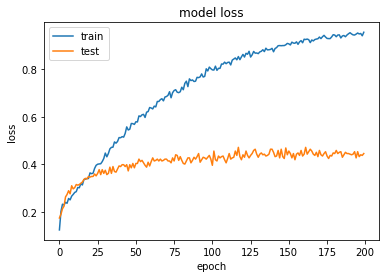

In [29]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

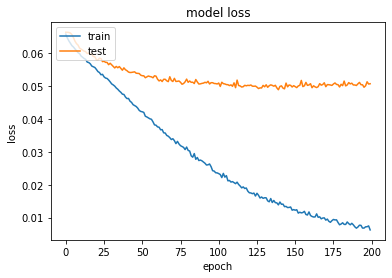

In [30]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\User\Desktop\bits\project\final test\saved_models\Emotion_Model.h5 


In [32]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt =  tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
12/12 [==============================] - 2s 116ms/step - loss: 0.0507 - accuracy: 0.4453
accuracy: 44.53%


In [33]:
preds = loaded_model.predict(X_test, 
                         batch_size=32, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

12/12 [==============================] - 3s 119ms/step


array([12,  4,  8, 13, 11,  0, 13, 11, 11,  6, 12,  8, 12,  1,  6,  1,  4,
        9, 10,  0,  2,  2, 11, 11, 11,  4,  8,  9,  9,  7,  4,  1,  5, 11,
        9,  7,  0,  7,  9, 11,  7, 12,  3,  2,  0, 12,  4,  4,  6,  8,  8,
       10, 13,  8, 11,  8, 12, 12,  9,  7,  5,  1, 10,  1, 11, 10,  7, 13,
        9, 11, 11, 12,  8,  2,  5, 11, 11, 11,  9, 13, 12, 13,  1,  1, 10,
       13, 11,  7,  2,  0,  3, 13,  2,  8, 10, 10,  0, 11, 11,  6, 11, 11,
       13, 11, 11, 13,  9, 11, 11,  3, 13, 11,  8, 10, 10,  8,  5,  4, 11,
        4,  4,  1, 11,  8,  9,  2,  3,  8, 11,  9, 12, 11, 12,  5, 10,  1,
       11,  1,  2,  7, 11, 12, 10,  8,  0,  6,  7,  9,  5, 13,  8,  4,  3,
       11,  5, 10,  9, 11, 12,  7,  7,  9, 11,  4,  9,  6, 11, 11, 13,  5,
        7,  9,  1, 10,  5,  3,  7,  1, 10,  6, 13,  8,  2, 11,  7,  9,  9,
        8, 11,  9,  9,  2,  0,  1, 11, 13, 12, 10,  7,  2,  7, 11,  2, 12,
       11, 11,  4,  4,  5,  9,  0, 11,  5,  2,  4, 10,  9,  0, 11, 10,  8,
        7,  4, 10,  5,  4

In [34]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[160:180]

,actualvalues,predictedvalues
160,male_angry,male_angry
161,male_neutral,male_fear
162,male_disgust,male_neutral
163,female_neutral,female_neutral
164,female_fear,male_fear
165,female_surprise,female_surprise
166,male_neutral,male_neutral
167,male_happy,male_neutral
168,male_surprise,male_surprise
169,female_neutral,female_sad


In [35]:
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,16
female_disgust,20
female_fear,17
female_happy,16
female_neutral,29
female_sad,20
female_surprise,14
male_angry,30
male_disgust,26


In [36]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.4453125


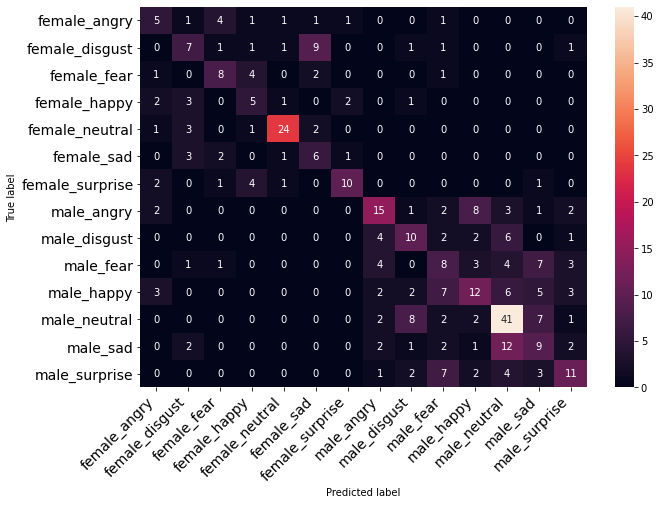

In [37]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [38]:
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.31      0.33      0.32        15
 female_disgust       0.35      0.32      0.33        22
    female_fear       0.47      0.50      0.48        16
   female_happy       0.31      0.36      0.33        14
 female_neutral       0.83      0.77      0.80        31
     female_sad       0.30      0.46      0.36        13
female_surprise       0.71      0.53      0.61        19
     male_angry       0.50      0.44      0.47        34
   male_disgust       0.38      0.40      0.39        25
      male_fear       0.24      0.26      0.25        31
     male_happy       0.40      0.30      0.34        40
   male_neutral       0.54      0.65      0.59        63
       male_sad       0.27      0.29      0.28        31
  male_surprise       0.46      0.37      0.41        30

       accuracy                           0.45       384
      macro avg       0.43      0.43      0.43       384
   weighted avg       0.45   

## LIVE DEMO 

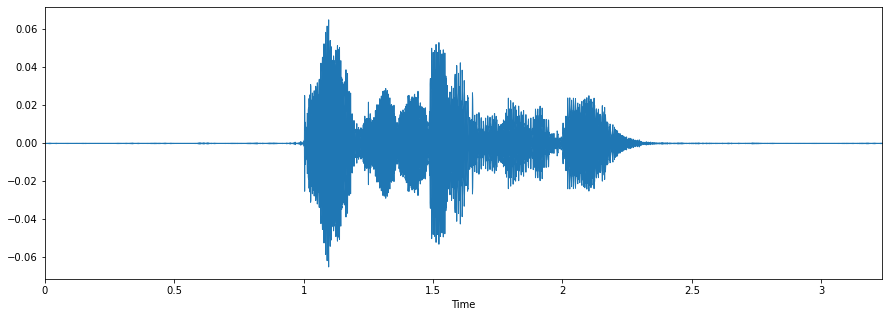

In [40]:
data, sampling_rate = librosa.load(RAV + 'Actor_11/03-01-03-01-02-02-11.wav')
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
ipd.Audio(RAV + 'Actor_11/03-01-03-01-02-02-11.wav')

In [41]:
X, sample_rate = librosa.load(RAV + 'Actor_11/03-01-03-01-02-02-11.wav', res_type='kaiser_fast',duration=2.5,
                              sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T
twodim= np.expand_dims(livedf2, axis=2)
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)
livepreds1=livepreds.argmax(axis=1)
liveabc = livepreds1.astype(int).flatten()
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

1/1 [==============================] - 1s 729ms/step


array(['male_neutral'], dtype=object)